In [1]:
from FileOpener.CSVReader.CSVReader import CSVReader as csv
import FileOpener.new_backtest as newb

In [2]:
fn_directory = "CSVFile/FinancialData/Korea"
fn_kdq_opq = "OP_INCOME_KDQ.csv" 
fn_kse_opq = "OP_INCOME_KSE.csv" 

kdq_opq = csv.financial_reader(directory=fn_directory, filename=fn_kdq_opq)
kse_opq = csv.financial_reader(directory=fn_directory, filename=fn_kse_opq)

## 분기별 적전
    ## 분기별 연간 누적 영업이익
    ## 전 4개 분기 누적 영업이익(이하 전) 흑자 / 현분기 적자: 적전    

In [3]:
def ptod_screen(fn_opq):
    
    current = fn_opq.shift(1).rolling(window=4).sum() 
    bef = current.shift(1)
    
    return (current < 0) & (bef > 0)

In [4]:
kdq_opq_scr = ptod_screen(kdq_opq)
kse_opq_scr = ptod_screen(kse_opq)

In [5]:
kdq_opq_scr.tail()

,A000250,A000440,A001000,A001540,A001810,A001840,A002230,A002290,A002680,A002800,...,A900280,A900290,A900300,A900310,A900340,A950110,A950130,A950140,A950160,A950170
Code,,,,,,,,,,,,,,,,,,,,,
2017-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-06-30,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2018-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
kse_opq_scr.tail()

,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A293480,A294870,A298000,A298020,A298040,A298050,A298690,A300720,A306200,A900140
Code,,,,,,,,,,,,,,,,,,,,,
2017-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2018-06-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
prc_directory = "CSVFile/Price/Korea/Stocks/"
fn_kdq_cls = "KOSDAQ_FROM_1998_close.csv"
fn_kse_cls = "KOSPI_FROM_1998_close.csv"

kdq_prc = csv.price_reader(directory=prc_directory, filename=fn_kdq_cls)
kse_prc = csv.price_reader(directory=prc_directory, filename=fn_kse_cls)

In [6]:
kdq_back_obj = newb.Financial(price=kdq_prc)
kse_back_obj = newb.Financial(price=kse_prc)

In [40]:
kdq_rt = kdq_back_obj.backtest(kdq_opq_scr, 'Q')
kse_rt = kse_back_obj.backtest(kse_opq_scr, 'Q')

D:\Udemy_Course\TradingDev\WiseData\FileOpener\new_backtest.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ret.loc[:'1998-05-23'][ret.loc[:'1998-05-23'] > 1.08] = 1.08
C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\Udemy_Course\TradingDev\WiseData\FileOpener\new_backtest.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

## Cummulative Return

In [41]:
kse_rt_plt = newb.PFAnalysis.FinancePlot(kse_rt)
kdq_rt_plt = newb.PFAnalysis.FinancePlot(kdq_rt)

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ce9b4c4e48>)

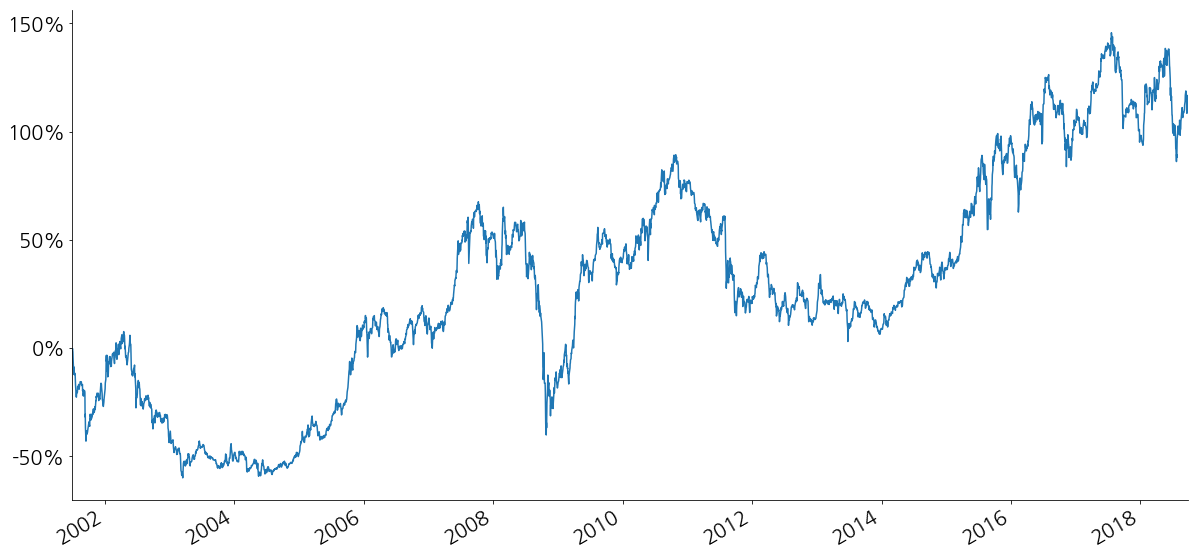

In [42]:
kse_rt_plt.CumReturn_Plot()

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ce9bbcd4e0>)

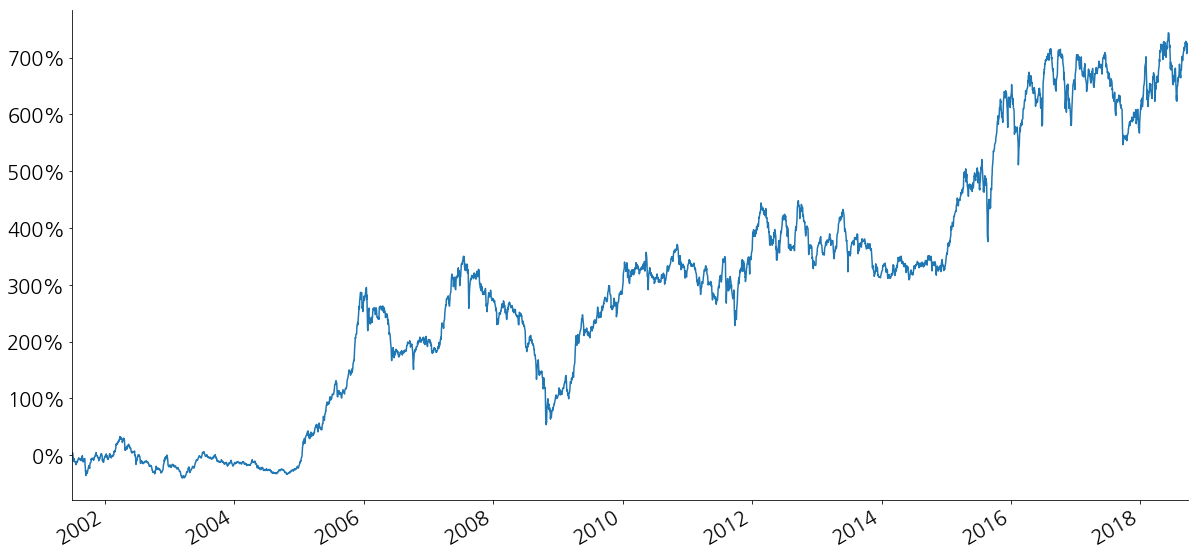

In [43]:
kdq_rt_plt.CumReturn_Plot()

## Return Statistics

In [36]:
kse_rt_stat = newb.PFAnalysis.PfOneWay(kse_rt)
kdq_rt_stat = newb.PFAnalysis.PfOneWay(kdq_rt)

In [37]:
kse_rt_stat.preety_print('A')

총수익률                       115.61%
Arithmetic Mean Return       9.72%
Geometric Mean Return        4.13%
Median Return                0.00%
Vol.                        25.95%
Upside Vol.                 16.36%
Downside Vol.               21.49%
MDD                         63.85%
dtype: object

In [38]:
kdq_rt_stat.preety_print('A')

총수익률                       720.95%
Arithmetic Mean Return      25.61%
Geometric Mean Return       11.72%
Median Return                5.50%
Vol.                        26.99%
Upside Vol.                 16.71%
Downside Vol.               22.30%
MDD                         61.86%
dtype: object

## 분기별 흑전

    ## 분기별 연간 누적 영업이익
    ## 전 4개 분기 누적 영업이익(이하 전) 적자 / 현분기 흑자    

In [22]:
def dtop_screen(fn_opq):
    
    current = fn_opq.shift(1).rolling(window=4).sum() 
    bef = current.shift(1)
    
    return (current > 0) & (bef < 0)



In [23]:
p_kdq_opq_scr = dtop_screen(kdq_opq)
p_kse_opq_scr = dtop_screen(kse_opq)

In [39]:
p_kdq_rt = kdq_back_obj.backtest(p_kdq_opq_scr, 'A')
p_kse_rt = kse_back_obj.backtest(p_kse_opq_scr, 'A')

D:\Udemy_Course\TradingDev\WiseData\FileOpener\new_backtest.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ret.loc[:'1998-05-23'][ret.loc[:'1998-05-23'] > 1.08] = 1.08
C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\Udemy_Course\TradingDev\WiseData\FileOpener\new_backtest.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

KeyError: 'the label [2000-03-31 00:00:00] is not in the [index]'

In [25]:
p_kse_rt_plt = newb.PFAnalysis.FinancePlot(p_kse_rt)
p_kdq_rt_plt = newb.PFAnalysis.FinancePlot(p_kdq_rt)

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ce9c27ca58>)

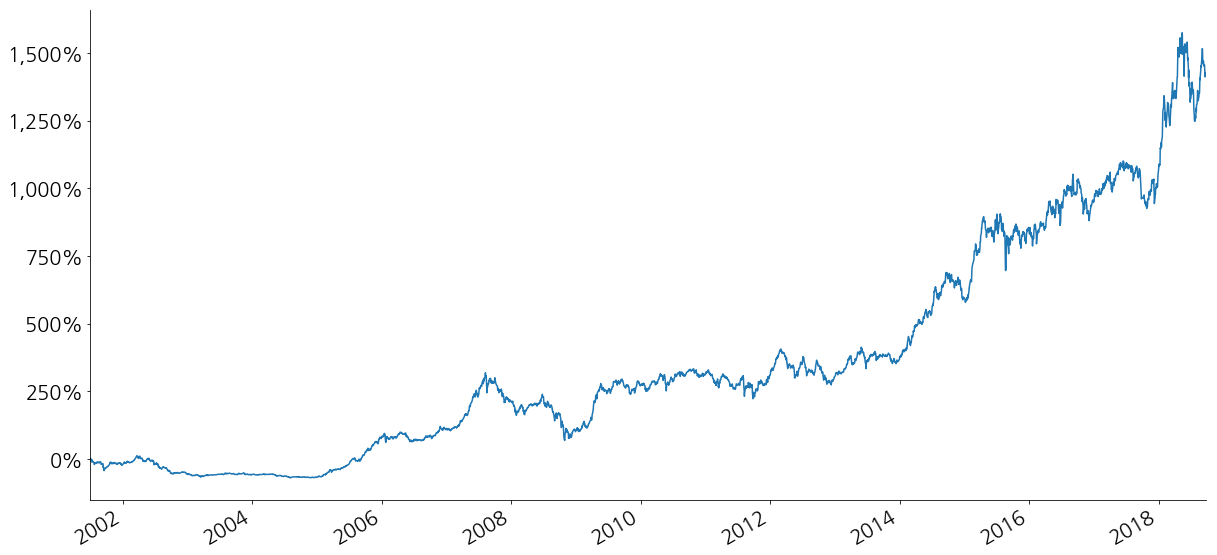

In [26]:
p_kse_rt_plt.CumReturn_Plot()

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ce9b0dab70>)

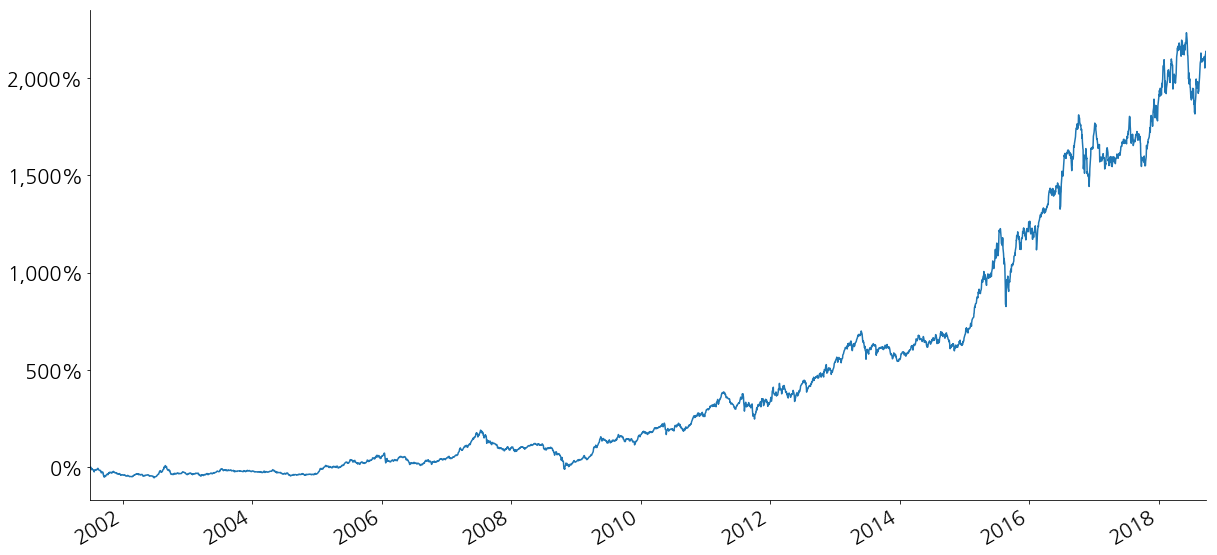

In [27]:
p_kdq_rt_plt.CumReturn_Plot()

In [28]:
p_kse_rt_stat = newb.PFAnalysis.PfOneWay(p_kse_rt)
p_kdq_rt_stat = newb.PFAnalysis.PfOneWay(p_kdq_rt)

In [29]:
p_kse_rt_stat.preety_print('A')

총수익률                       1427.69%
Arithmetic Mean Return       32.88%
Geometric Mean Return        15.43%
Median Return                10.36%
Vol.                         26.43%
Upside Vol.                  16.95%
Downside Vol.                21.12%
MDD                          70.02%
dtype: object

In [30]:
p_kdq_rt_stat.preety_print('A')

총수익률                       2101.12%
Arithmetic Mean Return       24.35%
Geometric Mean Return        17.67%
Median Return                14.65%
Vol.                         28.85%
Upside Vol.                  17.42%
Downside Vol.                24.23%
MDD                          59.56%
dtype: object